#  **Практическое занятие №4. Метод градиентного спуска.**

In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

## Простые примеры

### Одномерный случай


Функция:
$y = f(x) = x^2$

Производная: $f'(x)= 2x$

Начальное приближение: $x_0 =1.6$

Размер шага: $\gamma = 0.2$

Шаг градиентного спуска:
$x_{i+1} = x_i - \gamma 2x_i$


In [2]:
def func(x):
    return x ** 2

def grad(x):
    return 2 * x

def step(x, lr):
    return x - lr * grad(x)

In [3]:
lr = 0.2
x_hist = [1.6]

for i in range(20):
    x_curr = x_hist[-1]
    x_next = step(x_curr, lr)
    x_hist.append(x_next)

# YOUR CODE HERE
x_hist = np.array(x_hist)
y_hist = func(x_hist)

In [4]:
x_hist

array([1.60000000e+00, 9.60000000e-01, 5.76000000e-01, 3.45600000e-01,
       2.07360000e-01, 1.24416000e-01, 7.46496000e-02, 4.47897600e-02,
       2.68738560e-02, 1.61243136e-02, 9.67458816e-03, 5.80475290e-03,
       3.48285174e-03, 2.08971104e-03, 1.25382663e-03, 7.52295975e-04,
       4.51377585e-04, 2.70826551e-04, 1.62495931e-04, 9.74975584e-05,
       5.84985350e-05])

In [6]:
x_i+1 - x_i

NameError: name 'x_i' is not defined

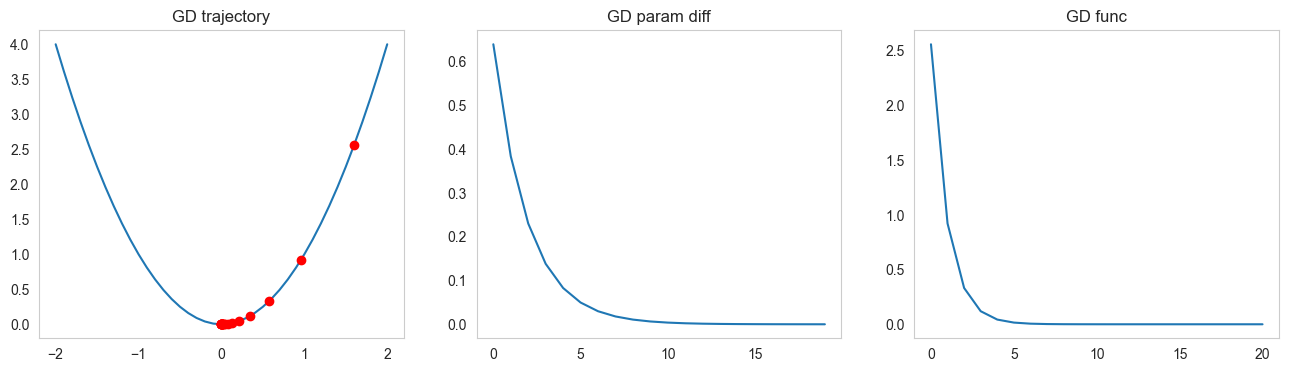

In [7]:
plt.figure(figsize=(16,4))


plt.subplot(1, 3, 1)
plt.title('GD trajectory')

x_grid = np.arange(-2, 2.1, 0.1)
y_grid = func(x_grid)
plt.plot(x_grid, y_grid)

plt.scatter(x_hist, y_hist, c='r', zorder=10)

plt.grid()


plt.subplot(1, 3, 2)
plt.title('GD param diff')

diff = np.abs(np.diff(x_hist))
plt.plot(np.arange(len(diff)), diff)

plt.grid()


plt.subplot(1, 3, 3)
plt.title('GD func')

plt.plot(np.arange(len(y_hist)), y_hist)

plt.grid()


plt.show()

### Двумерный случай


Функция:
$z = f(x_1, x_2)\ =x_1^2 + x_2^2$


Градиент: $\nabla f(x_1, x_2) = (2x_1, 2x_2)$

Начальное приближение: $(x_0, y_0) = (0.8, 0.8)$

Размер шага: $\gamma = 0.1$

Шаг градиентного спуска:
$(x^{i+1}, y^{i+1}) = (x^i, y^i) - \gamma(2x^i, 2y^i)$

In [8]:
def func(x):
    return np.sum(x ** 2)

def grad(x):
    return x * 2

def step(x, lr):
    return x - lr * grad(x)

In [9]:
lr = 0.1
x_hist = [np.array([0.8, 0.8])]

for i in range(20):
    x_curr = x_hist[-1]
    x_next = step(x_curr, lr)
    x_hist.append(x_next)

# YOUR CODE HERE
x_hist = np.array(x_hist)
y_hist = [func(x) for x in x_hist]

In [10]:
def make_levels(grid, func, num_levels=50):
    X, Y = np.meshgrid(grid, grid)
    Z = np.empty_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = func(np.array([X[i, j], Y[i, j]]))
    levels = np.geomspace(np.min(Z), np.max(Z), num=num_levels)
    return X, Y, Z, levels

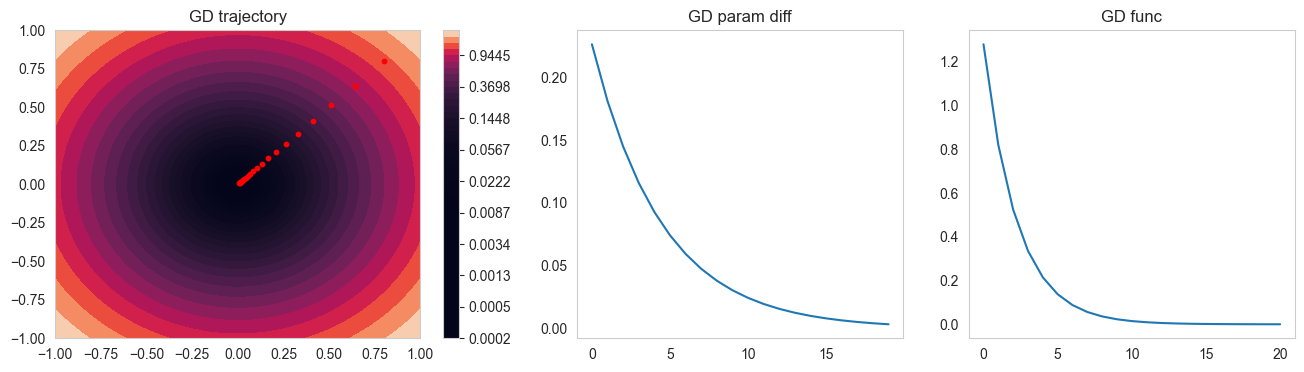

In [11]:
plt.figure(figsize=(16,4))


plt.subplot(1, 10, (1, 4))
plt.title('GD trajectory')

plt.contourf(*make_levels(np.linspace(-1, 1, 100), func))
plt.colorbar()

plt.scatter(x_hist[:,0], x_hist[:,1], c='r', s=10, zorder=10)


plt.subplot(1, 10, (5, 7))
plt.title('GD param diff')

diff = np.linalg.norm(x_hist[1:] - x_hist[:-1], axis=1)
plt.plot(np.arange(len(diff)), diff)

plt.grid()


plt.subplot(1, 10, (8, 10))
plt.title('GD func')

plt.plot(np.arange(len(y_hist)), y_hist)

plt.grid()


plt.subplots_adjust(wspace=1)
plt.show()

## Линейная регрессия

### Вспомним лекцию

Модель:
$$
f(X) = X w
$$

Лосс:
$$
L(w, X, y) = MSE(y, X w) =  \|y - X w\|^2_2 = \sum_i (y_i - \langle X_i, w \rangle)^2
$$

Градиент:
$$
\nabla L(w) = 2X^T(X w - y)
$$

Шаг градиентного спуска:
$$
w^{i+1} = w^i - \gamma \nabla L(w^i)
$$

**Задача:** доказать, что формула градиента верна.

Действительно, пусть $v = 2 X^T (X w - y)$, тогда:

$$
\nabla L_j(w) = \sum_i 2 (y_i - \langle X_i, w \rangle) (- X_{i,j}) = 2 \sum_i X_{i,j} (\langle X_i, w \rangle - y_i)
$$

$$
v_j = 2 \langle X_{*,j}, Xw - y \rangle = 2 \sum_i X_{i,j} (\langle X_i, w \rangle - y_i) = \nabla L_j(w)
$$

### Сгенерируем датасет

In [12]:
n_features = 2
n_objects = 500

np.random.seed(10)

X = np.random.uniform(-10, 10, (n_objects, n_features))

w = np.random.randn(n_features)

y = X @ w + np.random.randn(n_objects)

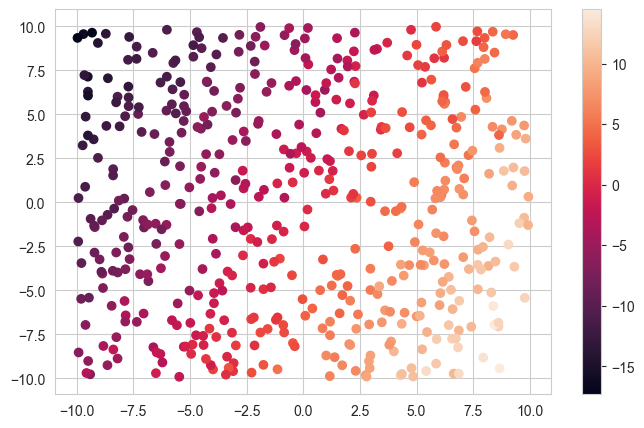

In [13]:
plt.figure(figsize=(8, 5))

plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

plt.show()

### Реализуем градиентный спуск

In [14]:
X

array([[ 5.42641287, -9.58496101],
       [ 2.6729647 ,  4.97607765],
       [-0.02985975, -5.50406709],
       [-6.0387427 ,  5.21061424],
       [-6.61778327, -8.23320372],
       [ 3.70719637,  9.06786692],
       [-9.92103467,  0.24384527],
       [ 6.25241923,  2.25052134],
       [ 4.43510635, -4.16247864],
       [ 8.35548245,  4.29151567],
       [ 0.85088736, -7.15659905],
       [-2.5331848 ,  3.4826723 ],
       [-1.16333651, -1.31972013],
       [ 2.35533957,  0.26276485],
       [ 3.00794364,  2.02077907],
       [ 6.10446394,  0.43294305],
       [ 8.17297762, -3.61527822],
       [-8.19081301, -3.98599887],
       [-7.72031276,  6.57362653],
       [-9.06207361,  2.52574297],
       [ 0.95172312,  6.38573991],
       [-6.02104921,  7.13700605],
       [-2.96694721,  5.09295383],
       [-4.08076586,  7.67872959],
       [-3.48976724, -6.69968205],
       [-2.14941512, -8.13079251],
       [ 6.42211316, -6.97695961],
       [-2.31771103,  8.88521424],
       [ 9.7525095 ,

In [ ]:
w - размерность 2
X - размерность 100 * 2
y - размерность 100

In [15]:
def loss(w, X, y):
    return np.sum((X @ w - y) ** 2)
    
def grad(w, X, y):
    return 2 * X.T @ (X @ w - y)

def step(w, X, y, lr):
    return w - lr * grad(w, X, y)

In [16]:
lr = 1e-5
w_hist = [np.zeros(n_features)]
l_hist = [loss(w_hist[-1], X, y)]

for i in range(20):
    w_hist.append(step(w_hist[-1], X, y, lr))
    l_hist.append(loss(w_hist[-1], X, y))

w_hist = np.array(w_hist)

In [17]:
[ 0.3572789 , -0.18746801]
5000000, 2

100, 2

(100, 2)

In [18]:
w_hist

array([[ 0.        ,  0.        ],
       [ 0.3572789 , -0.18746801],
       [ 0.59936879, -0.31008489],
       [ 0.76338253, -0.39033201],
       [ 0.87448447, -0.44288147],
       [ 0.94973408, -0.47731406],
       [ 1.0006943 , -0.49988952],
       [ 1.03520118, -0.51470008],
       [ 1.05856427, -0.52442255],
       [ 1.07438067, -0.53080893],
       [ 1.085087  , -0.53500657],
       [ 1.09233354, -0.53776735],
       [ 1.09723789, -0.53958426],
       [ 1.10055679, -0.54078076],
       [ 1.10280258, -0.5415692 ],
       [ 1.10432213, -0.54208908],
       [ 1.1053502 , -0.54243209],
       [ 1.1060457 , -0.54265855],
       [ 1.1065162 , -0.54280816],
       [ 1.10683445, -0.54290705],
       [ 1.10704971, -0.54297247]])

In [19]:
w

array([ 1.09712083, -0.53857737])

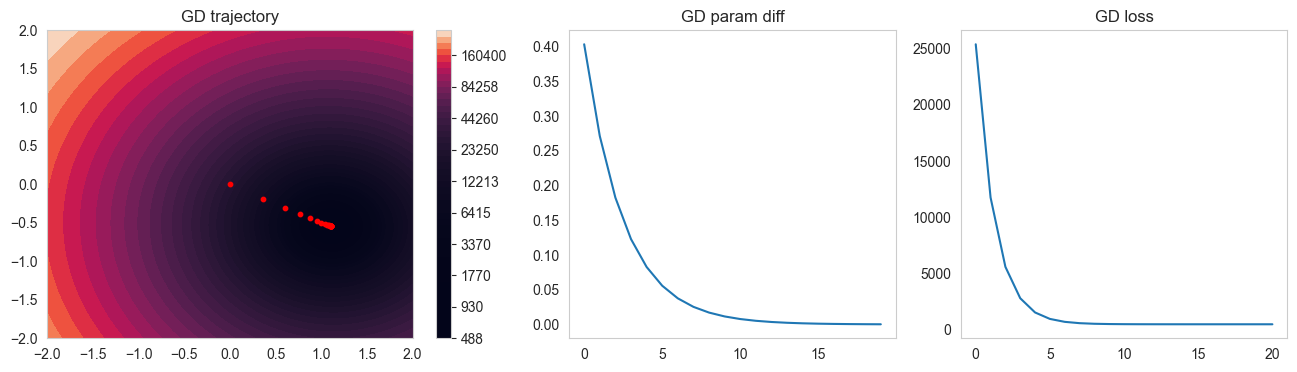

In [20]:
plt.figure(figsize=(16,4))


plt.subplot(1, 10, (1, 4))
plt.title('GD trajectory')

plt.contourf(*make_levels(np.linspace(-2, 2), lambda w: loss(w, X, y)))
plt.colorbar()

plt.scatter(w_hist[:,0], w_hist[:,1], c='r', s=10, zorder=10)


plt.subplot(1, 10, (5, 7))
plt.title('GD param diff')

diff = np.linalg.norm(w_hist[1:] - w_hist[:-1], axis=1)
plt.plot(np.arange(len(diff)), diff)

plt.grid()


plt.subplot(1, 10, (8, 10))
plt.title('GD loss')

plt.plot(np.arange(len(l_hist)), l_hist)

plt.grid()

plt.subplots_adjust(wspace=1)
plt.show()

### Добавим динамический learning_rate

In [21]:
lr = 1e-4

w_hist = [np.zeros(n_features)]
l_hist = [loss(w_hist[-1], X, y)]

for i in range(20):
    w_hist.append(step(w_hist[-1], X, y, lr))
    l_hist.append(loss(w_hist[-1], X, y))
    # update lr
    if l_hist[-1] > l_hist[-2]:
        lr = lr / 10
    print(lr)

w_hist = np.array(w_hist)

1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05


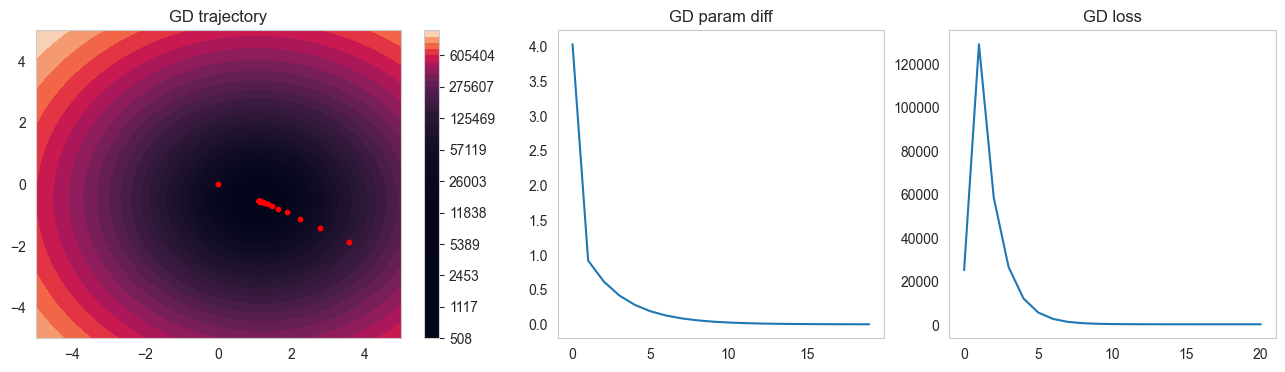

In [22]:
plt.figure(figsize=(16,4))


plt.subplot(1, 10, (1, 4))
plt.title('GD trajectory')

plt.contourf(*make_levels(np.linspace(-5, 5), lambda w: loss(w, X, y)))
plt.colorbar()

plt.scatter(w_hist[:,0], w_hist[:,1], c='r', s=10, zorder=10)


plt.subplot(1, 10, (5, 7))
plt.title('GD param diff')

diff = np.linalg.norm(w_hist[1:] - w_hist[:-1], axis=1)
plt.plot(np.arange(len(diff)), diff)

plt.grid()


plt.subplot(1, 10, (8, 10))
plt.title('GD loss')

plt.plot(np.arange(len(l_hist)), l_hist)

plt.grid()

plt.subplots_adjust(wspace=1)
plt.show()

### Реализуем SGD

In [23]:
lr = 5 * 1e-4
chunk_size = 100

w_hist = [np.zeros(n_features)]
l_hist = [loss(w_hist[-1], X, y)]

for i in range(20):
    ind = np.random.randint(0, high=len(X), size=chunk_size)
    print(ind)
    X_chunk = X[ind,:]
    y_chunk = y[ind]
    w_hist.append(step(w_hist[-1], X_chunk, y_chunk, lr))
    l_hist.append(loss(w_hist[-1], X_chunk, y_chunk))

w_hist = np.array(w_hist)

[214  72 135  91 116 481 202  46  26 309 483  83 209 490  41 328  44   1
  21  69 287 160  33   7 135  72 221  68 172 434 381 383 357 180 258   4
  22  19  86 193 314 123 328 278 430 465  59 461 261 112 393 202  62 393
 274 337  19 297 488 244 361 299 262 300 476 177  77 354 307 291 155  23
 135 255  49 421 117 269  21 254  78 450  51 288 112 473 201 154 117 184
  13 342 166 381 388  69 457 495  74  75]
[324  41  50 184 406  14 135 328 387 259  10 467 464 129 436 477 331  11
  64 408 445 151  78 317 227 207 175 408 364 265 403  51 359  39  71 468
 214 430 210  73 366 475 202 202  43  49 473 367 332 274  76 192  79 406
 198  61  46 244 491 227 357 356 305 197 147 115 433 426  64 469 354 183
 157  62  74 297 483  12 167  96 292 170  43 475 195 421 493  32 207 129
 270  25 331 215  46 442 425 185  48 149]
[288 332 441  33 171  46 488 177 173  77 471 349 100 141 291 259 352  25
 255 239 169 159   4  54 390 470 168  99 277 220 471 496 330 184 251 249
 317  97 114 412 227 469 257 262 289 240

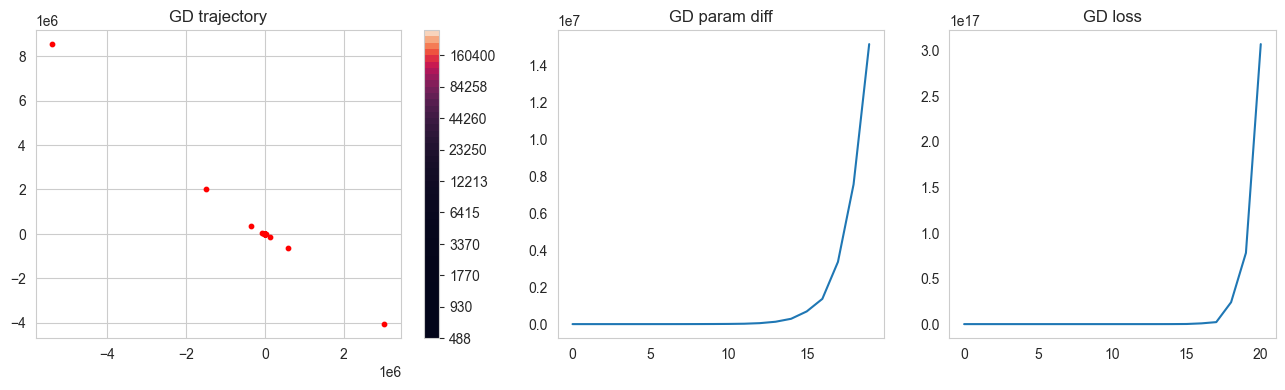

In [24]:
plt.figure(figsize=(16,4))


plt.subplot(1, 10, (1, 4))
plt.title('GD trajectory')

plt.contourf(*make_levels(np.linspace(-2, 2), lambda w: loss(w, X, y)))
plt.colorbar()

plt.scatter(w_hist[:,0], w_hist[:,1], c='r', s=10, zorder=10)


plt.subplot(1, 10, (5, 7))
plt.title('GD param diff')

diff = np.linalg.norm(w_hist[1:] - w_hist[:-1], axis=1)
plt.plot(np.arange(len(diff)), diff)

plt.grid()


plt.subplot(1, 10, (8, 10))
plt.title('GD loss')

plt.plot(np.arange(len(l_hist)), l_hist)

plt.grid()

plt.subplots_adjust(wspace=1)
plt.show()

In [25]:
l_hist

[25360.251852083376,
 39270.329884142935,
 159913.33809938212,
 530777.2310019868,
 5686622.09466497,
 24674238.749149002,
 102968159.24667975,
 185040664.6903686,
 2018936361.227521,
 10506885970.614952,
 40082453780.39044,
 121608930315.9375,
 709228084590.2985,
 5077858906550.722,
 27783747348938.156,
 136592112186063.19,
 812877309446172.6,
 2180682403517355.0,
 2.3983232302113468e+16,
 7.806371002992387e+16,
 3.069391507253173e+17]